In [1]:
import numpy as np 
import pandas as pd 
import cv2 # image and video processing library to be used for reading and resizing our images

import matplotlib.pyplot as plt
%matplotlib inline 

import random # to split and shuffle our dataset
import gc # garbage collector for cleaning deleted data from memory

# Input data files are available in the "../input/" directory.

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# Any results you write to the current directory are saved as output.

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
# create a file path to our train and test data
train_dir = '../input/dogs-vs-cats-redux-kernels-edition/train'
test_dir = '../input/dogs-vs-cats-redux-kernels-edition/test'

In [3]:
# list comprehension to get all the images in the train data zip file
# and retrieve all images with dog/cat in their name
train_dogs = ['../input/dogs-vs-cats-redux-kernels-edition/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] # get dog images
train_cats = ['../input/dogs-vs-cats-redux-kernels-edition/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i] # get cat images

test_imgs = ['../input/dogs-vs-cats-redux-kernels-edition/test/{}'.format(i) for i in os.listdir(test_dir)] # get test images

In [4]:
train_imgs = train_dogs[:2000] + train_cats[:2000] # grab the images from train_dogs and train_cats and concatenate them

In [5]:
random.shuffle(train_imgs) #shuffle the training images so they aren't ordered by first half dogs and second half cats

In [6]:
# now that we have train_imgs, we don't need train_dogs and train_cats so we get rid of them so we don't run out of 
# memory when training our model
del train_dogs
del train_cats
gc.collect()

19

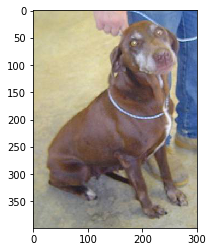

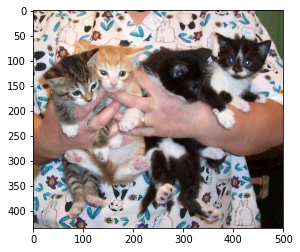

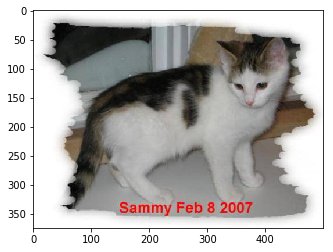

In [7]:
# lets view some images in train_imgs
import matplotlib.image as mpimg #import an image plotting module from matplotlib
for ima in train_imgs[0:3]: # run a for loop to plot the first three images in train_imgs
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

The images above are not the same dimensions so we need to resize them to all the same. 
Lets declare the new dimensions to be 150 x 150 for height and width and 3 channels (for colour).

In [8]:
# resize the images using the cv2 module
nrows = 150
ncolumns = 150
channels = 3

In [9]:
# function to read and resize the images
def read_and_process_image(list_of_images):
    '''
    Returns two arrays:
    X is an array of resized images
    y is an array of labels
    '''
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        # read the image
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))

        # get the labels
        if 'dog' in image[-13:-1]:
            y.append(1)
        elif 'cat' in image[-13:-1]:
            y.append(0)
        
    return X, y

In [10]:
# call the function
X, y = read_and_process_image(train_imgs)

X is now an array of image pixel values and y is a list of labels. 

In [11]:
# preview of the first image and label
X[0]

array([[[143, 190, 194],
        [144, 191, 195],
        [144, 191, 195],
        ...,
        [166, 101,  63],
        [165, 102,  64],
        [163, 100,  62]],

       [[144, 191, 195],
        [146, 193, 197],
        [146, 193, 197],
        ...,
        [167, 102,  64],
        [157,  94,  56],
        [164, 101,  63]],

       [[146, 193, 197],
        [147, 194, 198],
        [146, 194, 198],
        ...,
        [177, 112,  74],
        [171, 108,  70],
        [168, 105,  67]],

       ...,

       [[140, 154, 152],
        [141, 155, 153],
        [140, 154, 152],
        ...,
        [163, 186, 188],
        [158, 179, 180],
        [158, 178, 178]],

       [[143, 157, 155],
        [143, 157, 155],
        [137, 151, 149],
        ...,
        [151, 173, 178],
        [155, 176, 178],
        [159, 176, 179]],

       [[138, 152, 150],
        [146, 160, 158],
        [147, 161, 159],
        ...,
        [143, 164, 171],
        [143, 162, 167],
        [156, 173, 175]]

In [12]:
y[0:5]

[1, 0, 0, 0, 1]

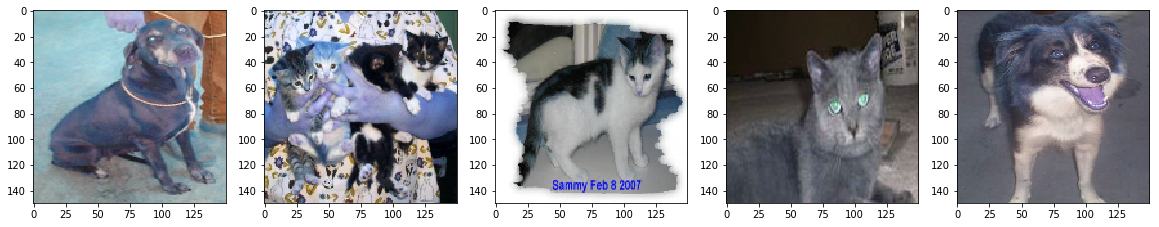

In [13]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns + 1, columns, i+1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for Cats and Dogs')

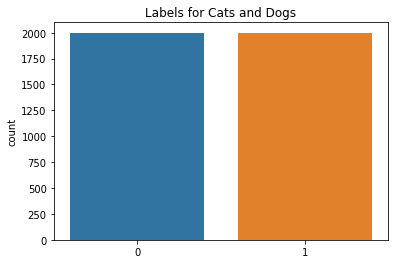

In [14]:
import seaborn as sns
del train_imgs # delete train_imgs since it has already been converted to an array and saved in X
gc.collect()

# convert list to numpy array to use in our model as X and y are currently a python array list
X = np.array(X)
y = np.array(y)

# lets make sure our labels contain the correct number of images
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [15]:
# check shape of data
print('Shape of train images is:', X.shape)
print('Shape of labels is:', y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


This matches our previous heght, width, and channels.

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2) 
# test_size =0.2 means we set 20% of the data to be assigned to the validation set, 
# and 80% to the train set

In [17]:
print('Shape of train images is:', X_train.shape)
print('Shape of test images is:', X_val.shape)
print('Shape of labels is:', y_train.shape)
print('Shape of labels is:', y_val.shape)

Shape of train images is: (3200, 150, 150, 3)
Shape of test images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


In [18]:
del X
del y
gc.collect()

10

In [19]:
# get the length of the train and validation data
ntrain = len(X_train)
ntest = len(X_val)

batch_size = 32

## Create Model

Using convolutional neual network

In [20]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


## Network Architecture

Using VGGnet to arrange our convolution layers

In [21]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## Compile The Model

In [23]:
# we'll use the RMSprop optimizer with a learning rate of 0.0001
# we'll use binary_crossentropy loss because its a binary classification
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Image Data Generator

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# with the ImageDataGenerator complete, pass the train and validation set
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [26]:
# training the model
history = model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // batch_size,
                             epochs = 64,
                             validation_data=val_generator,
                             validation_steps=ntest // batch_size)

Epoch 1/64
100/100 [==============================] - 17s 169ms/step - loss: 0.6955 - acc: 0.5247 - val_loss: 0.6863 - val_acc: 0.6025
Epoch 2/64
100/100 [==============================] - 15s 149ms/step - loss: 0.6820 - acc: 0.5603 - val_loss: 0.6543 - val_acc: 0.5938
Epoch 3/64
100/100 [==============================] - 14s 142ms/step - loss: 0.6724 - acc: 0.5813 - val_loss: 0.5797 - val_acc: 0.5888
Epoch 4/64
100/100 [==============================] - 14s 142ms/step - loss: 0.6612 - acc: 0.5959 - val_loss: 0.5862 - val_acc: 0.6025
Epoch 5/64
100/100 [==============================] - 14s 142ms/step - loss: 0.6454 - acc: 0.6169 - val_loss: 0.5300 - val_acc: 0.6513
Epoch 6/64
100/100 [==============================] - 14s 142ms/step - loss: 0.6294 - acc: 0.6328 - val_loss: 0.6430 - val_acc: 0.6988
Epoch 7/64
100/100 [==============================] - 14s 143ms/step - loss: 0.6276 - acc: 0.6494 - val_loss: 0.5579 - val_acc: 0.7038
Epoch 8/64
100/100 [==============================] - 1

100/100 [==============================] - 14s 141ms/step - loss: 0.4590 - acc: 0.7828 - val_loss: 0.3840 - val_acc: 0.8462
Epoch 62/64
100/100 [==============================] - 14s 141ms/step - loss: 0.4442 - acc: 0.7887 - val_loss: 0.4728 - val_acc: 0.8487
Epoch 63/64
100/100 [==============================] - 14s 141ms/step - loss: 0.4453 - acc: 0.7944 - val_loss: 0.3748 - val_acc: 0.8475
Epoch 64/64
100/100 [==============================] - 14s 142ms/step - loss: 0.4370 - acc: 0.7950 - val_loss: 0.3715 - val_acc: 0.8288


After 64 epochs, the accuracy is about 83%

In [27]:
# save the model for use next time without training again
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

Now lets test our model on the test images

In [28]:
# prediction on the first ten images of the test dataset
X_test, y_test = read_and_process_image(test_imgs[0:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

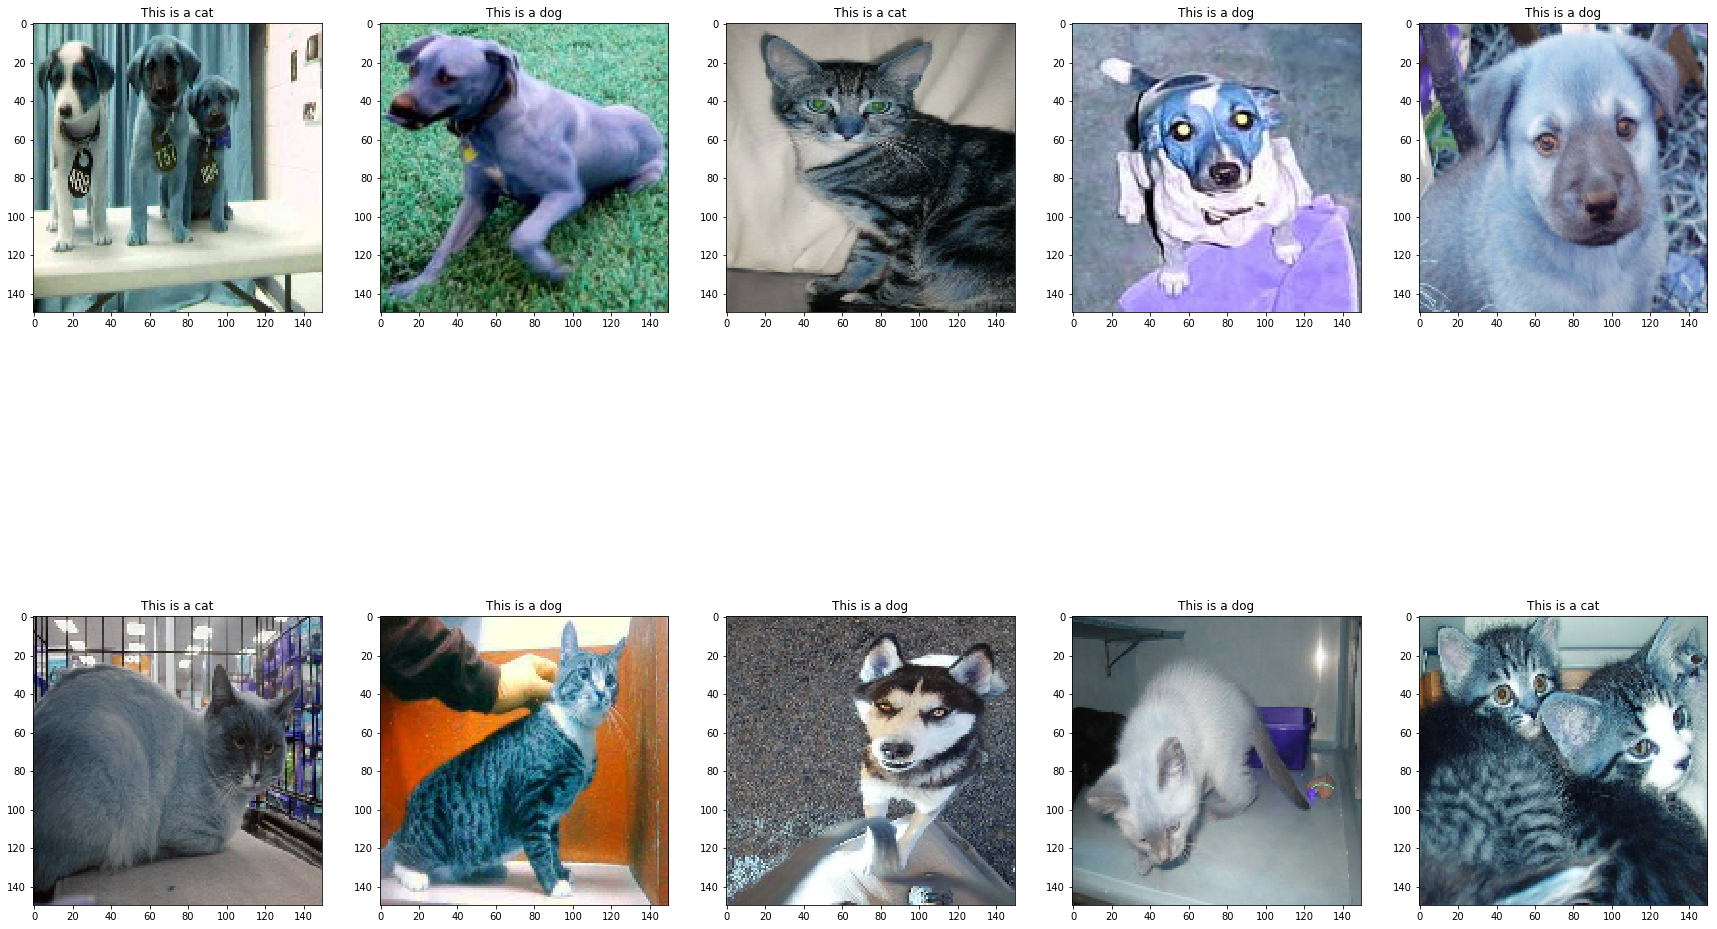

In [29]:
i = 0
text_labels = [] # create a list to hold the labels we will generate
plt.figure(figsize=(30,20)) # figure size of the images we will plot
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch) # make a prediction on the image 
    if pred > 0.5: # if prediction is > 0.5 it should be a dog, so append 'dog'
        text_labels.append('dog')
    else: # otherwise, it should be a cat
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1) # subplot to plot multiple images
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i+=1
    if i % 10 == 0:
        break
plt.show()